In [1]:
%load_ext autoreload 
%autoreload 2

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

# Data classes

In [3]:
from cbviz.cbviz.utils import DataNum

In [80]:
all = pd.read_csv('./Metabolite-logFC-Signatures.csv', index_col=0)
df = all.iloc[:, [0,2]].copy()

dn = DataNum(df2)

TypeError: Expected 3 numeric columns, got 0

In [75]:
expected = np.repeat('floating', 1)
observed = df.apply(infer_dtype).values
type(expected)

numpy.ndarray

In [81]:
s1 = np.random.permutation(np.repeat(['WT', 'Balanced', 'Minor', 'Major'], (30, 80, 50, 30)))
s2 = np.repeat(['Basal-like', "Classical"], (57, 133))
x = [y for x in [np.random.normal(loc=i, size=s) for i, s in zip((2, -2) , (57, 133)) ] for y in x]

df2 = pd.DataFrame({"x" : x, "s1" : s1, "s2" : s2})

In [83]:
dn = DataNum(df2)

TypeError: Expected 3 numeric columns, got 1

In [39]:
while True:
    try:
        x = int(input("Please enter a number: "))
        break
    except ValueError:
        print("Oops!  That was no valid number.  Try again...")

KeyboardInterrupt: Interrupted by user

In [29]:
expected = np.repeat('float', dn.ncols)
observed = np.array([all[col].dtype.name.rstrip('_12346') for col in all.columns])
all(expected == observed)

ValueError: shape mismatch: objects cannot be broadcast to a single shape

# KDE related 

## Split violin 

In [24]:
s1 = np.random.permutation(np.repeat(['WT', 'Balanced', 'Minor', 'Major'], (30, 80, 50, 30)))
s2 = np.repeat(['Basal-like', "Classical"], (57, 133))
x = [y for x in [np.random.normal(loc=i, size=s) for i, s in zip((2, -2) , (57, 133)) ] for y in x]

data = pd.DataFrame({"x" : x, "s1" : s1, "s2" : s2})

In [4]:
len(data['s1'].astype('category').cat.categories)

4

In [5]:
from cbviz.cbviz.KDE import SplitViolin

In [33]:
sp = SplitViolin(data, s1_order=['WT', 'Balanced', 'Minor', 'Major'], s2_order=['Classical', 'Basal-like'])

ValueError: DataFrame needs three columns, dtypes allowed are: float - object|category - object|category

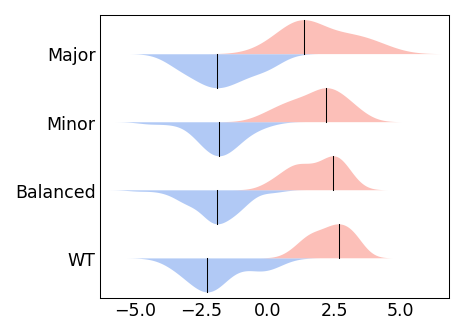

In [28]:
plt.style.use('cviz')
fig, ax = plt.subplots(figsize=(3,2.5))

for kde in sp.get_violins(colors=('cornflowerblue', 'salmon')):

    ax.fill_betweenx(kde.density, kde.grid, facecolor=kde.color, alpha=0.5)
    ax.plot(kde.mode.ycoords, kde.mode.xcoords, lw=0.5, c='k')

ax.set_yticks(*sp.get_s1_ticks())

# fig.savefig('./test/Test-SplitViolin.pdf')

## Ridge plot

In [49]:
s1 = np.repeat(['WT', 'Balanced', 'Minor', 'Major'], (30, 80, 50, 30))
x = [y for x in [np.random.normal(loc=i, size=s) for i, s in zip(range(4) , (30, 80, 50, 30)) ] for y in x]

data = pd.DataFrame({"x" : x, "s1" : s1})
data

,x,s1
0,1.286023,WT
1,-1.207937,WT
2,-0.637252,WT
3,-0.585386,WT
4,-0.110654,WT
...,...,...
185,3.406423,Major
186,3.726015,Major
187,4.186788,Major
188,2.624377,Major


In [36]:
from cbviz.cbviz.KDE import Ridge

In [73]:
rp = Ridge(data, s1_order=['WT','Balanced', 'Minor', 'Major'], scale_factor=0.8)

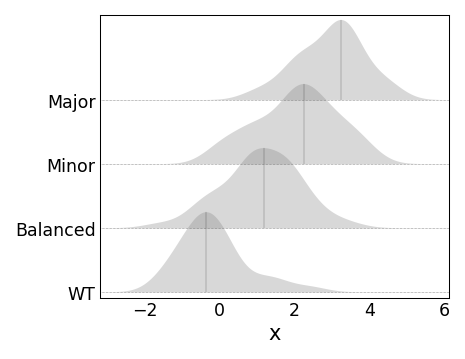

In [77]:
plt.style.use('cviz')
fig, ax = plt.subplots(figsize=(3,2.5))

for kde in rp.get_kdes():

    ax.fill_betweenx(kde.density, kde.grid, facecolor=kde.color, alpha=0.3)
    ax.plot(kde.mode.ycoords, kde.mode.xcoords, lw=0.1, c='k')

ax.set_yticks(*rp.get_s1_ticks())
ax.set_xlabel(rp.ylabel)
[ax.axhline(i, ls=':', lw=0.25, c='0.15') for i in rp.get_s1_ticks()[0]]

# XYview

The base class implementing scatter plot, pearson correlation, a regression line and a line representing slope 1

In [84]:
metabolites = ['L-Cystine', 'Cysteine', 'NADH']

In [85]:
all = pd.read_csv('./Metabolite-logFC-Signatures.csv', index_col=0)
df = all.iloc[:, [0,2]].copy()

In [86]:
from cbviz.cbviz.xytools import XYview
from adjustText import adjust_text

In [125]:
cond = df.index.isin(metabolites)
xv = XYview(df, highlight=metabolites, s=np.where(cond, 40, 10), c=np.where(cond, 'r', '.5'), alpha=1)

In [119]:
!pip install adjustText

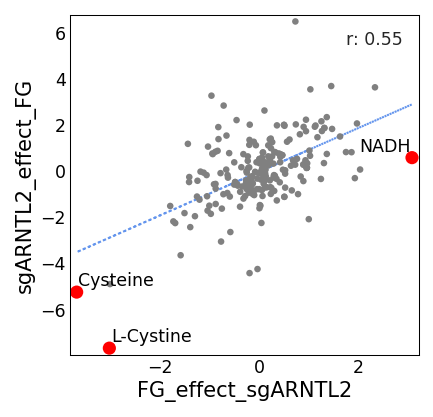

In [133]:
plt.style.use('cviz')

fig, ax = plt.subplots(figsize=(3,3))

ax.scatter(xv.x, xv.y, **xv.scatter_kw)
xv.add_correlation(fontsize='small')
xv.add_reg_line(color='cornflowerblue', lw=1)
xv.label_dots(adjust=True, fontsize='small')
xv.label_xy()
fig.savefig('./test/Test-XYview.pdf')

# XYpairs

In [134]:
from cbviz.cbviz.xytools import XYpairs

In [135]:
metabolites = ['L-Cystine', 'Cysteine', 'NADH']

In [136]:
all = pd.read_csv('./Metabolite-logFC-Signatures.csv', index_col=0)

In [273]:
all = all.iloc[:, [1,0,3,2]]

In [274]:
cond = all.index.isin(metabolites)
xp = XYpairs(all, lower_tri=False)

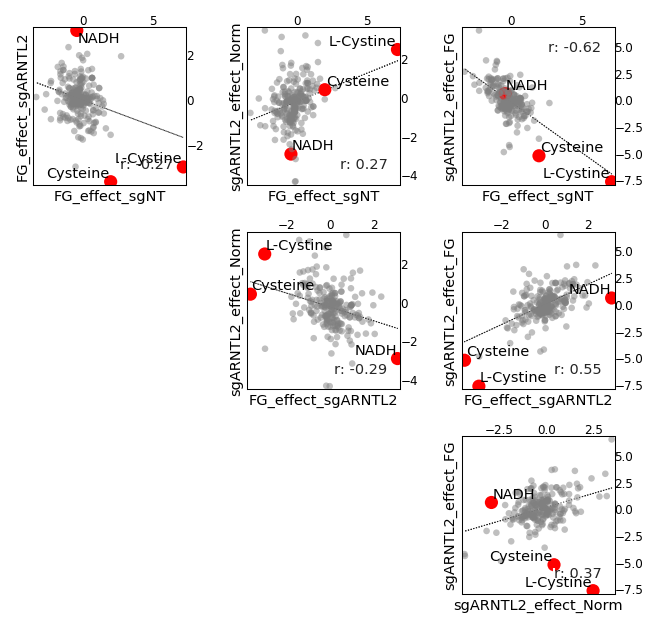

In [275]:
plt.style.use('cviz')

fig = plt.figure(figsize=(5, 5))

gs = xp.add_gridspec(hspace=0.3, wspace=0.4)

pairs = xp.get_pairs(highlight=metabolites, s=np.where(cond, 40, 10), c=np.where(cond, 'r', '0.5'), alpha=np.where(cond, 1, 0.5))
for pair in pairs:
    ax = fig.add_subplot(gs[pair.position])
    ax.tick_params(labelsize='xx-small', pad=0)
    xv = pair.XYview
    ax.scatter(xv.x, xv.y, **xv.scatter_kw)
    xv.add_reg_line()
    xv.label_dots(adjust=True, fontsize='x-small')
    if pair.combo == ['FG_effect_sgNT', 'sgARNTL2_effect_FG']:
        xv.add_correlation(loc=1)
    else:
        xv.add_correlation(loc=4)
    xv.label_xy(fontsize='x-small', outer=True)

# XYzoom

In [276]:
metabolites = ['L-Cystine', 'Cysteine', 'NADH']
all = pd.read_csv('./Metabolite-logFC-Signatures.csv', index_col=0)
df = all.iloc[:, [0,2]].copy()

In [277]:
from cbviz.cbviz.xytools import XYzoom

In [304]:
xz = XYzoom(df, (0, 'max'), (-2, 2))

In [305]:
xz

XYzoom(X: FG_effect_sgARNTL2, Y: sgARNTL2_effect_FG
Observations: 229
Zoom area: X (0.00 -> 3.07), Y (-2.00 -> 2.00)

In [288]:
'min3'.endswith('max')

False

In [ ]:
def _deduce_range(range:tuple):
    
    